# INTRODUCTION

## In finance, a loan is the lending of money by one or more individuals, organizations, or other entities to other individuals, organizations etc. The recipient (i.e., the borrower) incurs a debt and is usually liable to pay interest on that debt until it is repaid as well as to repay the principal amount borrowed

## AIM

The major aim of this notebook is to predict which of the customers will have their loan approved

# The main objective for this dataset:¶

**Using machine learning techniques to predict loan payments**

## Import module and library

In [4]:
import os #paths to file
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings# warning filter


#ploting libraries
import matplotlib.pyplot as plt 
import seaborn as sns

#relevant ML libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

#ML models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [5]:
#warning hadle
warnings.filterwarnings("ignore")

In [155]:
tr_df = pd.read_csv('train.csv')
tr_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [156]:
ts_df = pd.read_csv("test.csv")
ts_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [157]:
tr_df.shape


(614, 13)

in train datasets 614 rows and 13 columns

In [158]:
ts_df.shape

(367, 12)

in test datasets 367 rows and 12 columns

In [159]:
tr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [160]:
ts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [161]:
tr_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [162]:
tr_df.isnull().sum().sort_values(ascending= False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In train datasets NaN value present so firstly we want to remove this NaN value from this dataset

## Remove NaN value from train datasets

In [163]:
# fill NaN value with mode
tr_df["Credit_History"] = tr_df['Credit_History'].fillna(tr_df['Credit_History'].mode().values[0])

In [164]:
tr_df["LoanAmount"] = tr_df['LoanAmount'].fillna(tr_df['LoanAmount'].mode().values[0])

In [165]:
tr_df["Self_Employed"] = tr_df['Self_Employed'].fillna(tr_df['Self_Employed'].mode().values[0])

In [166]:
tr_df["Dependents"] = tr_df['Dependents'].fillna(tr_df['Dependents'].mode().values[0])

In [167]:
tr_df["Loan_Amount_Term"] = tr_df['Loan_Amount_Term'].fillna(tr_df['Loan_Amount_Term'].mode().values[0])

In [168]:
tr_df["Gender"] = tr_df['Gender'].fillna(tr_df['Gender'].mode().values[0])

In [169]:
tr_df["Married"] = tr_df['Married'].fillna(tr_df['Married'].mode().values[0])

In [170]:
tr_df.isnull().sum().sort_values(ascending= False)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Remove NaN value from test datasets

In [171]:
# fill NaN value with mode
ts_df["Gender"] = ts_df['Gender'].fillna(ts_df['Gender'].mode().values[0])

In [172]:
ts_df["Dependents"] = ts_df['Dependents'].fillna(ts_df['Dependents'].mode().values[0])

In [173]:
ts_df["Self_Employed"] = ts_df['Self_Employed'].fillna(ts_df['Self_Employed'].mode().values[0])

In [174]:
ts_df["Loan_Amount_Term"] = ts_df['Loan_Amount_Term'].fillna(ts_df['Loan_Amount_Term'].mode().values[0])

In [175]:
ts_df["LoanAmount"] = ts_df['LoanAmount'].fillna(ts_df['LoanAmount'].mode().values[0])

## Data Vesualization

<AxesSubplot:xlabel='Gender', ylabel='count'>

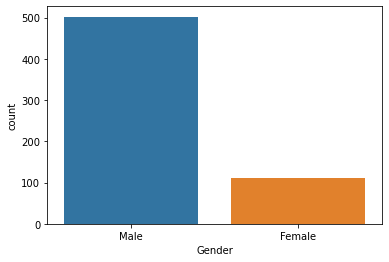

In [59]:
sns.countplot(tr_df['Gender'])

IN this datasts Male is more than by female 

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

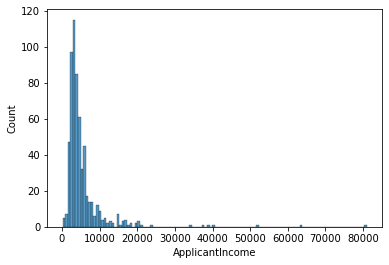

In [60]:
sns.histplot(tr_df['ApplicantIncome'])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Count'>

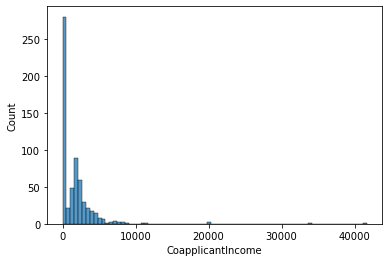

In [63]:
sns.histplot(tr_df['CoapplicantIncome'])

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

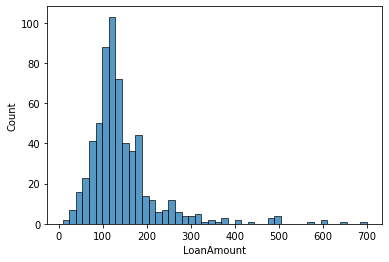

In [64]:
sns.histplot(tr_df['LoanAmount'])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Count'>

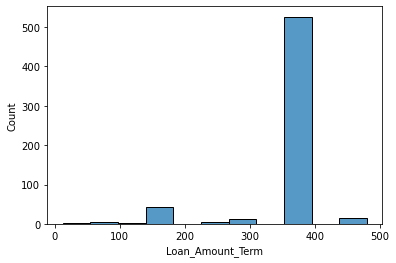

In [65]:
sns.histplot(tr_df['Loan_Amount_Term'])

<AxesSubplot:xlabel='Credit_History', ylabel='Count'>

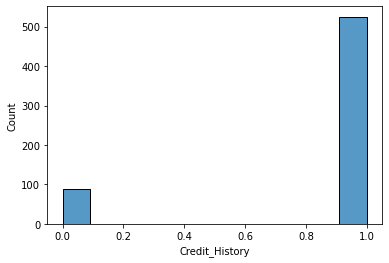

In [66]:
sns.histplot(tr_df['Credit_History'])

<AxesSubplot:xlabel='Gender', ylabel='count'>

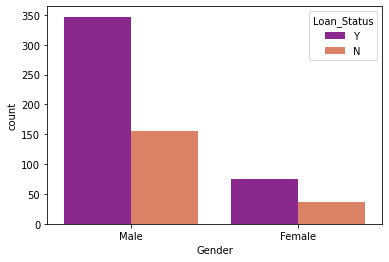

In [67]:
sns.countplot(x=tr_df['Gender'] ,hue='Loan_Status', data=tr_df ,palette='plasma')

<AxesSubplot:xlabel='Married', ylabel='count'>

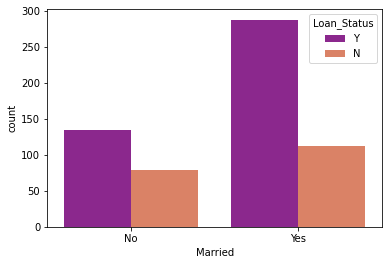

In [68]:
sns.countplot(x=tr_df['Married'] ,hue='Loan_Status', data=tr_df ,palette='plasma')

<AxesSubplot:xlabel='Dependents', ylabel='count'>

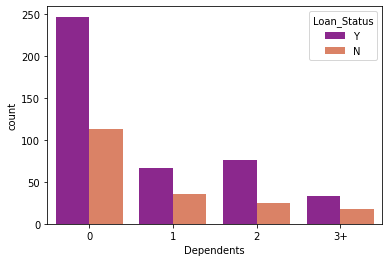

In [69]:
sns.countplot(x=tr_df['Dependents'] ,hue='Loan_Status', data=tr_df ,palette='plasma')

<AxesSubplot:xlabel='Education', ylabel='count'>

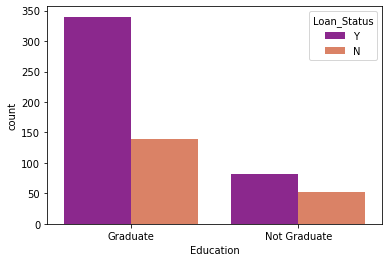

In [70]:
sns.countplot(x=tr_df['Education'] ,hue='Loan_Status', data=tr_df ,palette='plasma')

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

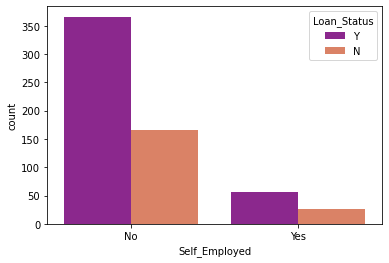

In [71]:
sns.countplot(x=tr_df['Self_Employed'] ,hue='Loan_Status', data=tr_df ,palette='plasma')

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

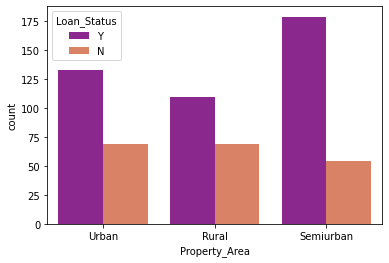

In [72]:
sns.countplot(x=tr_df['Property_Area'] ,hue='Loan_Status', data=tr_df ,palette='plasma')

In [100]:
tr_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

## Encoding data to numeric

### *Encoding for train datasets*

In [176]:
tr_df.Gender.value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [177]:
#converting categorical values to numbers
# replacing values
# convert Male to 1 and Female to 0

tr_df['Gender'].replace(['Male', 'Female'],[1, 0], inplace=True)


In [178]:

tr_df.Married.value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [179]:
# convert married status  yes to 1 and No to 0

tr_df['Married'].replace(['No', 'Yes'],[0, 1], inplace=True)

In [180]:

tr_df.Dependents.value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [181]:
tr_df['Dependents'].replace(['3+'],[3], inplace=True)

In [182]:
tr_df.Education.value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [183]:
# convert education columns value Not Graduate to 0 and Graduate to 1

tr_df['Education'].replace(['Not Graduate', 'Graduate'],[0, 1], inplace=True)

In [184]:
tr_df.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [185]:
 # convert Property_Area columns value Rural to 0, Semiurban to 1, Urban to 2
 
tr_df['Property_Area'].replace(['Rural', 'Semiurban', 'Urban'],[0, 1, 2], inplace=True)

In [186]:
# convert loan_status column value N to 0 and Y to 1

tr_df['Loan_Status'].replace(['N', 'Y'],[0, 1], inplace=True)

In [187]:
tr_df['Self_Employed'].replace(['No', 'Yes'],[0, 1], inplace=True)

### *Encoding for test datasets*

In [188]:
#converting categorical values to numbers
# replacing values
# convert Male to 1 and Female to 0

ts_df['Gender'].replace(['Male', 'Female'],[1, 0], inplace=True)

In [189]:
# convert married status  yes to 1 and No to 0

ts_df['Married'].replace(['No', 'Yes'],[0, 1], inplace=True)

In [190]:
ts_df['Dependents'].replace(['3+'],[3], inplace=True)

In [191]:
# convert education columns value Not Graduate to 0 and Graduate to 1

ts_df['Education'].replace(['Not Graduate', 'Graduate'],[0, 1], inplace=True)

In [192]:
 # convert Property_Area columns value Rural to 0, Semiurban to 1, Urban to 2
 
ts_df['Property_Area'].replace(['Rural', 'Semiurban', 'Urban'],[0, 1, 2], inplace=True)

In [193]:
ts_df['Self_Employed'].replace(['No', 'Yes'],[0, 1], inplace=True)

## finaly Encoded train dataset

In [194]:
tr_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,120.0,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,3,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1


## finaly Encoded Test Datasets

In [195]:
ts_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,1,0,5720,0,110.0,360.0,1.0,2
1,LP001022,1,1,1,1,0,3076,1500,126.0,360.0,1.0,2
2,LP001031,1,1,2,1,0,5000,1800,208.0,360.0,1.0,2
3,LP001035,1,1,2,1,0,2340,2546,100.0,360.0,NaN,2
4,LP001051,1,0,0,0,0,3276,0,78.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,1,1,3,0,1,4009,1777,113.0,360.0,1.0,2
363,LP002975,1,1,0,1,0,4158,709,115.0,360.0,1.0,2
364,LP002980,1,0,0,1,0,3250,1993,126.0,360.0,NaN,1
365,LP002986,1,1,0,1,0,5000,2393,158.0,360.0,1.0,0


In [196]:
tr_df.corr()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,-0.045364,-0.000525,0.058809,0.082912,0.106404,-0.074030,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,-0.012304,0.004489,0.051708,0.075948,0.146212,-0.100912,0.010938,0.004257,0.091478
Education,-0.045364,-0.012304,1.000000,0.010383,0.140760,0.062290,0.169436,0.073928,0.073658,0.065243,0.085884
Self_Employed,-0.000525,0.004489,0.010383,1.000000,0.127180,-0.016100,0.114971,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.140760,0.127180,1.000000,-0.116605,0.564698,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.062290,-0.016100,-0.116605,1.000000,0.189723,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.106404,0.146212,0.169436,0.114971,0.564698,0.189723,1.000000,0.037152,-0.000250,-0.047414,-0.031808
Loan_Amount_Term,-0.074030,-0.100912,0.073928,-0.033739,-0.046531,-0.059383,0.037152,1.000000,-0.004705,-0.076120,-0.022549
Credit_History,0.009170,0.010938,0.073658,-0.001550,-0.018615,0.011134,-0.000250,-0.004705,1.000000,0.001963,0.540556
Property_Area,-0.025752,0.004257,0.065243,-0.030860,-0.009500,0.010522,-0.047414,-0.076120,0.001963,1.000000,0.032112


# Machine learning models


## First of all we will divide our dataset into two variables X as the features we defined earlier and y as the Loan_Status the target value we want to predict.

In [218]:
X = tr_df.drop('Loan_Status', axis = 1)
X = tr_df.drop('Loan_ID', axis = 1)
y = tr_df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [219]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
332,1,0,0,1,0,2833,0.0,71.0,360.0,1.0,2,1
320,1,1,0,1,0,2400,2167.0,115.0,360.0,1.0,1,1
49,0,0,0,1,0,4000,2275.0,144.0,360.0,1.0,1,1
274,1,1,2,1,0,3900,0.0,90.0,360.0,1.0,1,1
25,1,1,0,1,1,9560,0.0,191.0,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
71,1,1,2,0,1,1875,1875.0,97.0,360.0,1.0,1,1
106,1,1,2,1,0,11417,1126.0,225.0,360.0,1.0,2,1
270,0,0,0,1,0,3237,0.0,30.0,360.0,1.0,2,1
435,0,1,0,1,0,10047,0.0,120.0,240.0,1.0,1,1


In [220]:
X_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
350,1,1,0,1,0,9083,0.0,228.0,360.0,1.0,1,1
377,1,1,0,1,0,4310,0.0,130.0,360.0,1.0,1,1
163,1,1,2,1,0,4167,1447.0,158.0,360.0,1.0,0,1
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
132,1,0,0,1,0,2718,0.0,70.0,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
467,1,1,0,1,0,16692,0.0,110.0,360.0,1.0,1,1
56,1,1,0,1,0,2132,1591.0,96.0,360.0,1.0,1,1
318,0,0,1,1,0,3541,0.0,112.0,360.0,1.0,1,1
346,1,1,0,0,0,3523,3230.0,152.0,360.0,0.0,0,0


In [221]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

y_predict = DT.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
DT_SC = accuracy_score(y_predict,y_test)
print(f"{round(DT_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00       161

    accuracy                           1.00       246
   macro avg       1.00      1.00      1.00       246
weighted avg       1.00      1.00      1.00       246

100.0% Accurate


In [222]:
Decision_Tree=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Decision_Tree.to_csv("Dection Tree.csv") 

In [223]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

y_predict = RF.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
RF_SC = accuracy_score(y_predict,y_test)
print(f"{round(RF_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00       161

    accuracy                           1.00       246
   macro avg       1.00      1.00      1.00       246
weighted avg       1.00      1.00      1.00       246

100.0% Accurate


In [224]:
Random_Forest=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Random_Forest.to_csv("Random Forest.csv")    

In [225]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

y_predict = LR.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
LR_SC = accuracy_score(y_predict,y_test)
print('accuracy is',accuracy_score(y_predict,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00       161

    accuracy                           1.00       246
   macro avg       1.00      1.00      1.00       246
weighted avg       1.00      1.00      1.00       246

accuracy is 1.0


In [226]:
Logistic_Regression=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Logistic_Regression.to_csv("Logistic Regression.csv")     